# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [6]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | waitangi
Processing Record 4 of Set 1 | emerald
Processing Record 5 of Set 1 | badger
Processing Record 6 of Set 1 | guerrero negro
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | kolonia
Processing Record 9 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 10 of Set 1 | tan-tan
Processing Record 11 of Set 1 | nongpoh
Processing Record 12 of Set 1 | kirensk
Processing Record 13 of Set 1 | kyabe
Processing Record 14 of Set 1 | zeya
Processing Record 15 of Set 1 | la passe
Processing Record 16 of Set 1 | atafu village
Processing Record 17 of Set 1 | northam
Processing Record 18 of Set 1 | edson
Processing Record 19 of Set 1 | port mathurin
Processing Record 20 of Set 1 | oneonta
Processing Record 21 of Set 1 | olonkinbyen
Processing Record 22 of Set 1 | labasa
Processing Reco

In [8]:
#print city_weather to see the document
city_weather

{'coord': {'lon': 95.7, 'lat': 22.5667},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 23.28,
  'feels_like': 24.01,
  'temp_min': 23.28,
  'temp_max': 23.28,
  'pressure': 1013,
  'humidity': 90,
  'sea_level': 1013,
  'grnd_level': 1001},
 'visibility': 10000,
 'wind': {'speed': 1.93, 'deg': 355, 'gust': 2.69},
 'clouds': {'all': 1},
 'dt': 1698368548,
 'sys': {'country': 'MM', 'sunrise': 1698363516, 'sunset': 1698404605},
 'timezone': 23400,
 'id': 1296736,
 'name': 'Shwebo',
 'cod': 200}

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-17.55,100,100,2.58,RU,1698368436
1,adamstown,-25.0660,-130.1015,22.86,77,65,3.11,PN,1698368437
2,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,1698368437
3,emerald,-23.5333,148.1667,24.08,13,0,4.89,AU,1698368438
4,badger,64.8000,-147.5333,-0.57,84,40,0.00,US,1698368439


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-17.55,100,100,2.58,RU,1698368436
1,adamstown,-25.0660,-130.1015,22.86,77,65,3.11,PN,1698368437
2,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,1698368437
3,emerald,-23.5333,148.1667,24.08,13,0,4.89,AU,1698368438
4,badger,64.8000,-147.5333,-0.57,84,40,0.00,US,1698368439


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

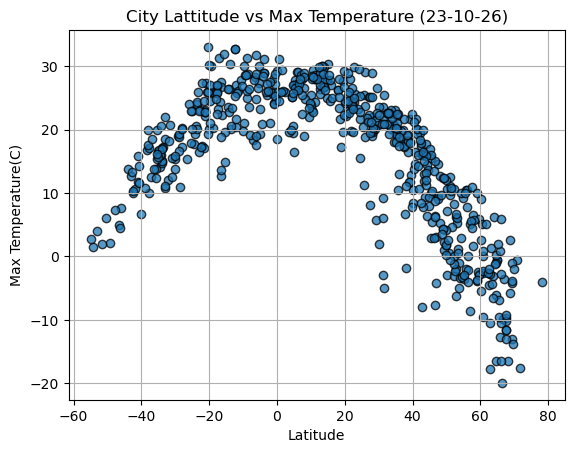

In [13]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Lattitude vs Max Temperature ({time.strftime('%y-%m-%d')})")

plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

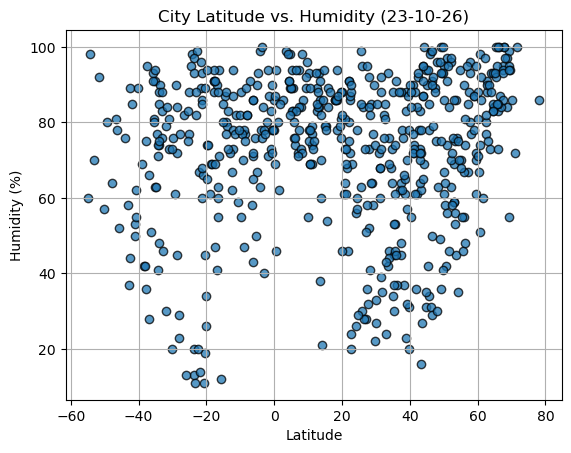

In [14]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="Black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

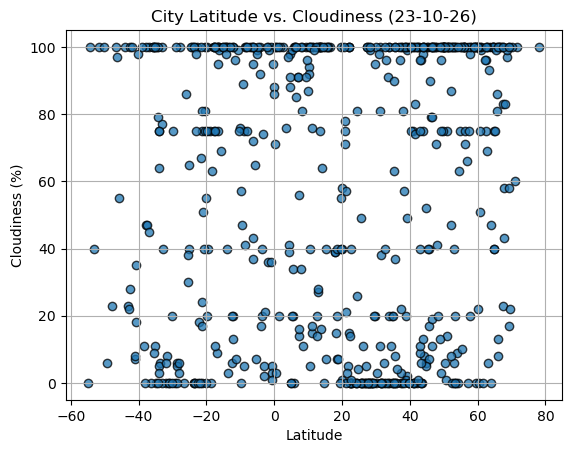

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df['Lat']
y_axis = city_data_df['Cloudiness']

plt.scatter(x_axis, y_axis, marker="o", edgecolors="Black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

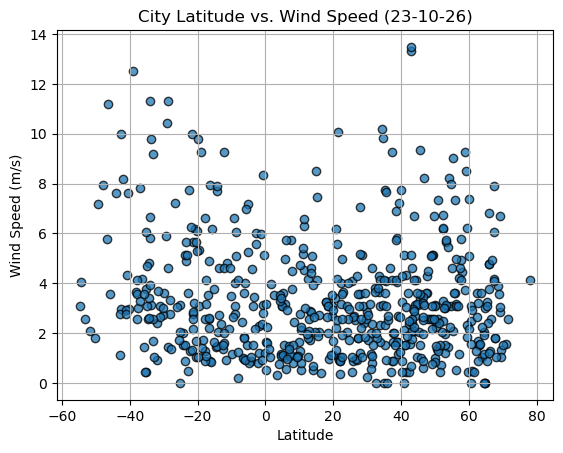

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df['Lat']
y_axis = city_data_df["Wind Speed"]

plt.scatter(x_axis, y_axis, marker="o", edgecolors="Black", alpha=0.75)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%y-%m-%d')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [33]:
# Define a function to create Linear Regression plots
def line_regress_plot(x, y, x_label, y_label):

    
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    print(f"The r-value is : {rvalue*rvalue}")
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
    plt.scatter(x, y, marker="o")
    plt.plot(x,regress_values, "r-")
  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
 
    return line_eq
   



In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-17.55,100,100,2.58,RU,1698368436
4,badger,64.8000,-147.5333,-0.57,84,40,0.00,US,1698368439
5,guerrero negro,27.9769,-114.0611,18.95,73,0,7.07,MX,1698368150
6,college,64.8569,-147.8028,-0.52,84,40,0.00,US,1698368439
7,kolonia,50.9333,6.9500,11.03,91,75,2.57,DE,1698368409


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,22.86,77,65,3.11,PN,1698368437
2,waitangi,-43.9535,-176.5597,13.79,76,100,7.60,NZ,1698368437
3,emerald,-23.5333,148.1667,24.08,13,0,4.89,AU,1698368438
14,atafu village,-8.5421,-172.5159,28.82,77,100,6.07,TK,1698368441
17,port mathurin,-19.6833,63.4167,24.53,74,100,5.33,MU,1698368441


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.7593974245483618


<function matplotlib.pyplot.show(close=None, block=None)>

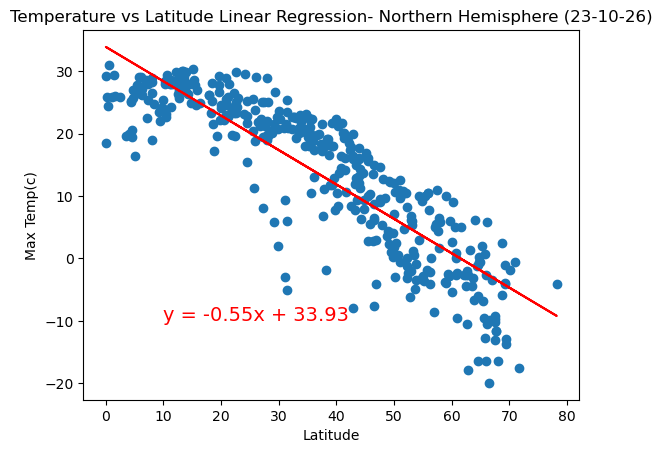

In [34]:
# Linear regression on Northern Hemisphere
line_eq = line_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Latitude", "Max Temp(c)" )
plt.title(f"Temperature vs Latitude Linear Regression- Northern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (10,-10), fontsize=14, color='red')
plt.show

The r-value is : 0.6529535833034777


<function matplotlib.pyplot.show(close=None, block=None)>

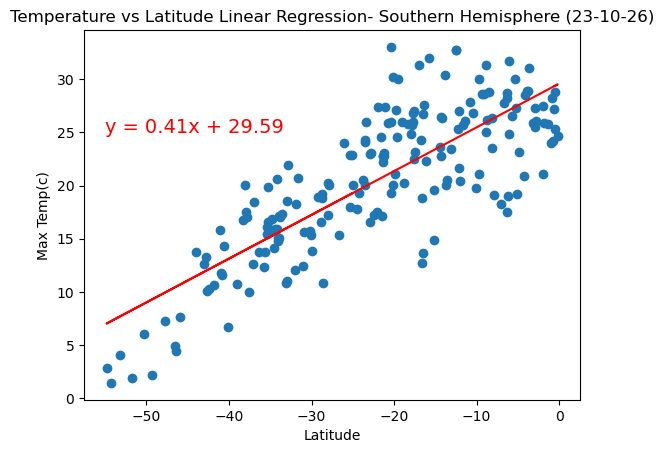

In [35]:
# Linear regression on Southern Hemisphere
line_eq = line_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Latitude", "Max Temp(c)" )
plt.title(f"Temperature vs Latitude Linear Regression- Southern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (-55,25), fontsize=14, color='red')
plt.show

**Discussion about the linear relationship:** 

The linear regression plot shows correlation between the latitude and teperatures in cities in the northern and southern hemispheres. 

The regession value also reflects the correlation in both hemispheres

 The closer the city to the equater, higher the max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.004318918598437387


<function matplotlib.pyplot.show(close=None, block=None)>

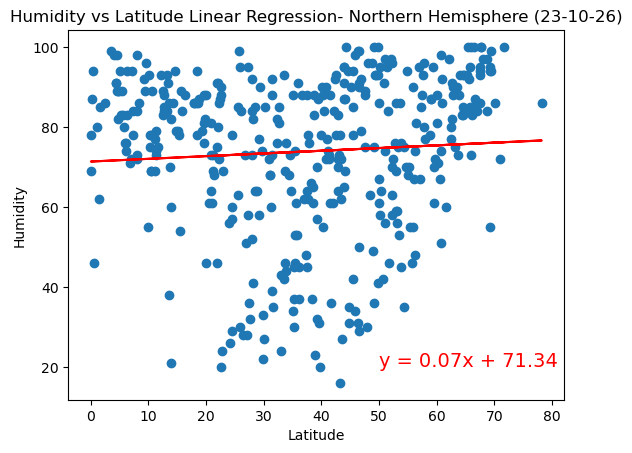

In [36]:
# Northern Hemisphere
line_eq = line_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Latitude", "Humidity" )
plt.title(f"Humidity vs Latitude Linear Regression- Northern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (50,20), fontsize=14, color='red')
plt.show

The r-value is : 0.021291138192559116


<function matplotlib.pyplot.show(close=None, block=None)>

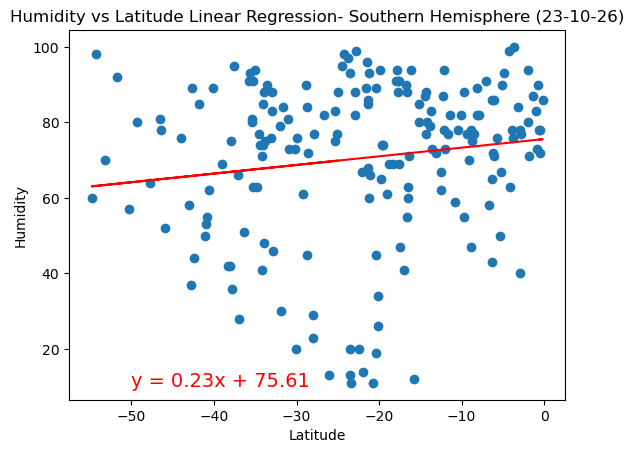

In [37]:
# Southern Hemisphere
line_eq = line_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Latitude", "Humidity" )
plt.title(f"Humidity vs Latitude Linear Regression- Southern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (-50,10), fontsize=14, color='red')
plt.show

**Discussion about the linear relationship:** Humidity vs Latitude

The r-value is too lower tahn one in both plots.

There is no significant correlation between humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.020985090493532556


<function matplotlib.pyplot.show(close=None, block=None)>

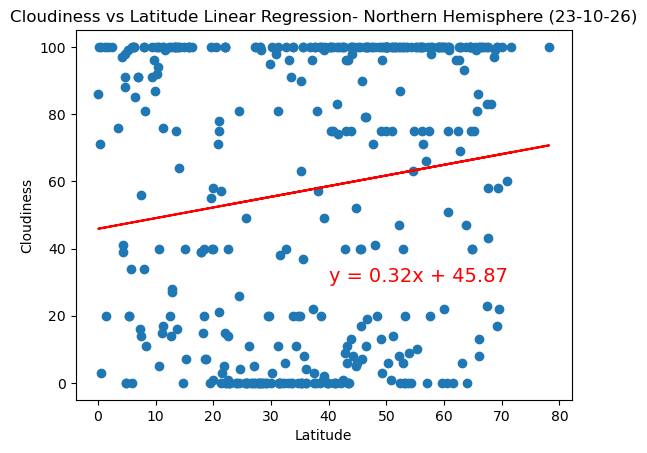

In [38]:
# Northern Hemisphere
line_eq = line_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Latitude", "Cloudiness" )
plt.title(f"Cloudiness vs Latitude Linear Regression- Northern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (40,30), fontsize=14, color='red')
plt.show

The r-value is : 0.016951171058126133


<function matplotlib.pyplot.show(close=None, block=None)>

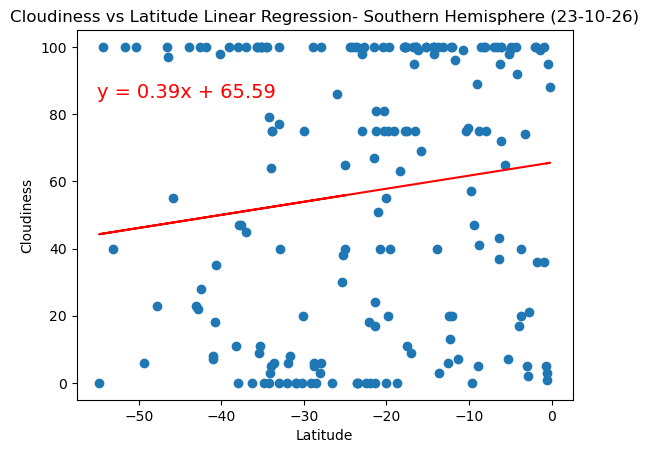

In [39]:
# Southern Hemisphere
line_eq = line_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Latitude", "Cloudiness" )
plt.title(f"Cloudiness vs Latitude Linear Regression- Southern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (-55,85), fontsize=14, color='red')
plt.show

**Discussion about the linear relationship:** Cloudiness vs Latitude

The r-value is too low for both hemispheres.

There is no significant correlation between the latitude and cloudiness

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.010747177129977529


<function matplotlib.pyplot.show(close=None, block=None)>

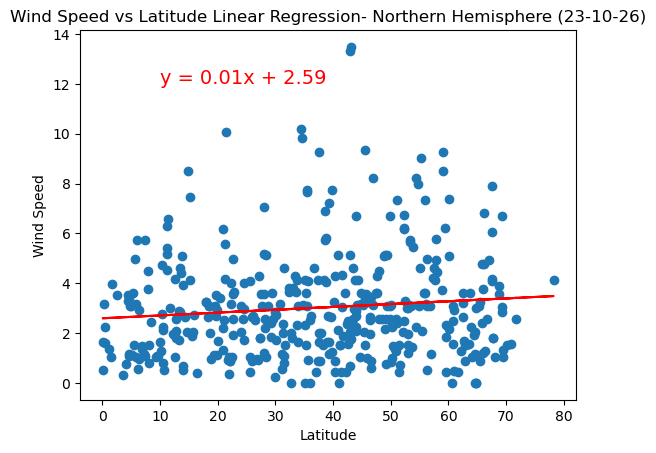

In [40]:
# Northern Hemisphere
line_eq = line_regress_plot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Latitude", "Wind Speed" )
plt.title(f"Wind Speed vs Latitude Linear Regression- Northern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (10,12), fontsize=14, color='red')
plt.show

The r-value is : 0.03973380546535339


<function matplotlib.pyplot.show(close=None, block=None)>

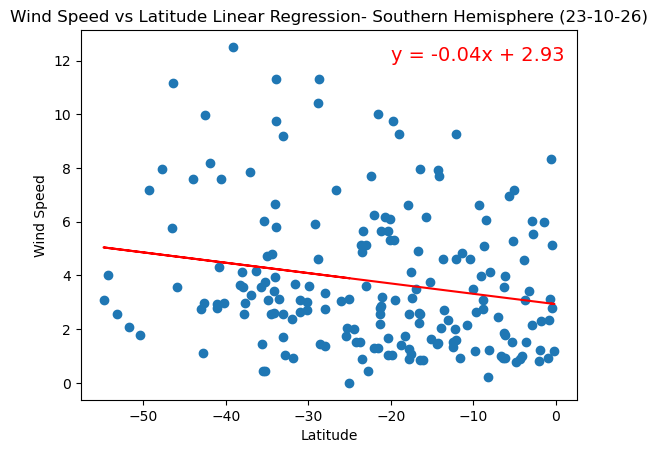

In [42]:
# Southern Hemisphere
line_eq = line_regress_plot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Latitude", "Wind Speed" )
plt.title(f"Wind Speed vs Latitude Linear Regression- Southern Hemisphere ({time.strftime('%y-%m-%d')})")
plt.annotate(line_eq, (-20,12), fontsize=14, color='red')
plt.show

**Discussion about the linear relationship:** Wind Speed vs Latitude

The plot and the r-value shows that there is no significant correlation between the wind speed and latitude in both hemispheres.